In [1]:
#Rail notes

# 2559 entries in rail
# two marketing campaigns (ABM and INNOTRANS)
# Focused in Central Europe

# AdTypes: Programmatic', 'Social media', 'Email', 'Display', Content syndication', 'Social email

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt

In [79]:
df = pd.read_csv("dataset/Advertising.csv", low_memory = False, usecols = lambda c: not c.startswith("Unnamed:"), parse_dates = ['Week'])


['Commercial' 'Country' 'Datacenter' 'IT' 'MOEM' 'MTL' 'PQ' 'Rail'
 'Residential' 'IT Channel'] 1039
['OPM' 'Converged Infrastructure' 'Converged Infrastructure/OPM' 'DCM'
 'PAP']


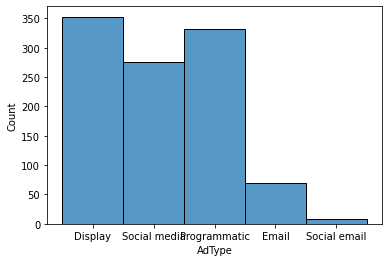

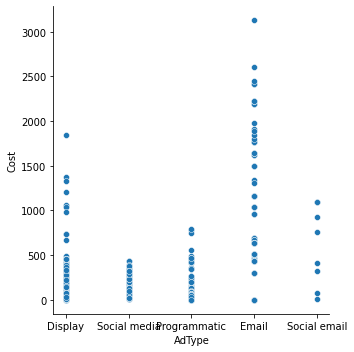

In [106]:
#look at DF rail and sort by SEASON

dfRail = df.copy()
dfRail = dfRail.loc[(dfRail["Segment"] == "IT") & (dfRail["AdType"] != "Content syndication")]

# TODO: Need to find a segment which has an equal spread of adtypes? 
# Or I could compare to seeimingly polarized segments that use different adtypes and discuss what factors lead to their success?

print(df["Segment"].unique(), dfRail.shape[0])

# 2559 in rail

print(dfRail["Season"].unique())

#ABM INNOTRANS MARKETING CAMPAIGN

# looks to be dominated by Programmatic lmoast completely?? 
sns.histplot(data=dfRail, x="AdType")


sns.relplot(data = dfRail, x = "AdType", y = "Cost") 

# IT looks pretty well balanced.





['Display' 'Social media' 'Programmatic' 'Email' 'Social email']


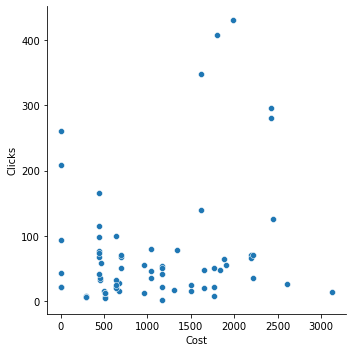

In [109]:
# breaking up IT by adtype

print(dfRail["AdType"].unique())

dfRailD = dfRail.loc[dfRail["AdType"] == "Display"]
dfRailSM = dfRail.loc[dfRail["AdType"] == "Social media"]
dfRailP = dfRail.loc[dfRail["AdType"] == "Programmatic"]
dfRailE = dfRail.loc[dfRail["AdType"] == "Email"]
dfRailSE = dfRail.loc[dfRail["AdType"] == "Social email"]


# SOCIAL MEDIA LOOKS VERY GOOD :D 
#sns.relplot(data = dfRailSM, x = "Cost", y = "Clicks") 

sns.relplot(data = dfRailE, x = "Cost", y = "Clicks") 

# engagement factor on emails is not proportional to the cost.

In [82]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [104]:
dfRail.dataframeName = 'dfRail'

dfRailCM = dfRailP.copy()
dfRailCM = dfRailCM.drop(columns = ["Week", "Num_Week", "Month", "Year", "Leads", "Opens"])
dfRailCM.dataframeName = 'dfRailCM'
   
#plotCorrelationMatrix(dfRailCM, 10)

dfRailCM.corr()


,Impressions,Clicks,Cost
Impressions,1.000000,0.731496,0.945604
Clicks,0.731496,1.000000,0.653142
Cost,0.945604,0.653142,1.000000
